In [2]:
import pandas as pd
import shap
import matplotlib.pyplot as plt 
# 读取player 的数据
player = pd.read_csv("../datafrom200/players.csv")
x_list = player.columns[7:-5]
x_list = ['Crossing', 'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control',
       'Acceleration', 'Sprint_Speed', 'Agility' , 'Balance',
       'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Defensive_Awareness']
X = player[x_list]
y = player["value"]

In [3]:
# 划分训练集 train, validation, test : 0.7, 0.15, 0.15
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=21)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=23)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor(n_estimators=600).fit(X_train, y_train)
print(gbdt.score(X_validation, y_validation))
print(gbdt.score(X_test, y_test))

explainer_gbdt = shap.TreeExplainer(gbdt)
shap_values_gbdt = explainer_gbdt.shap_values(X)

0.9051169019874236
0.8675889071420367


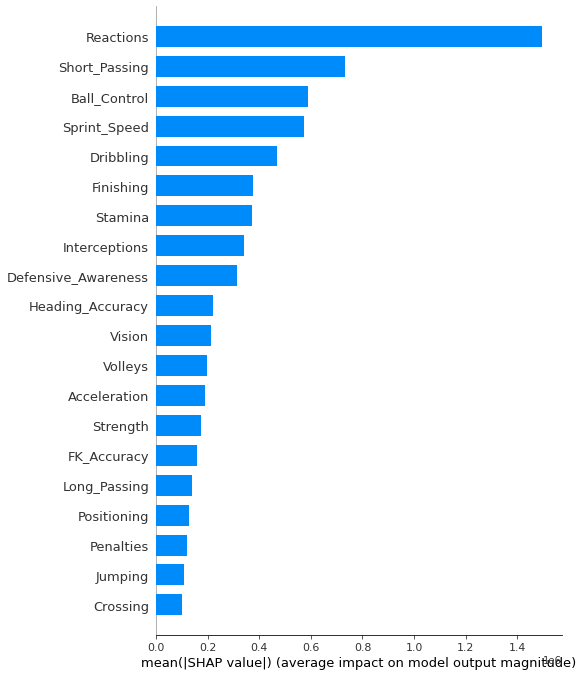

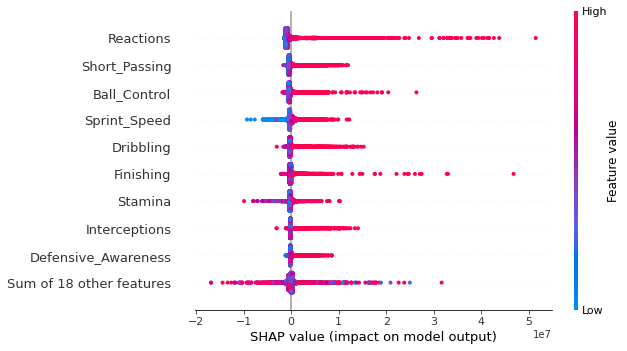

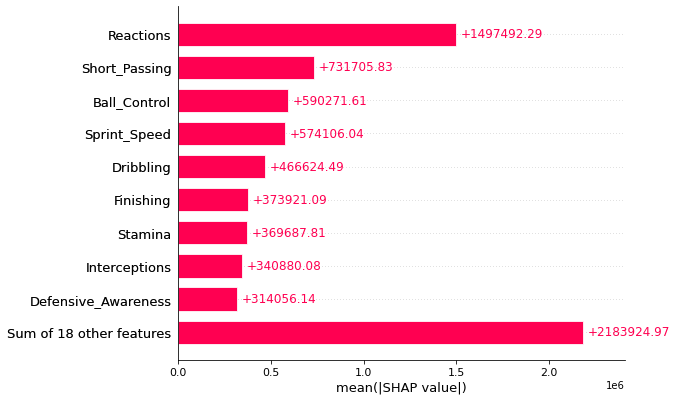

In [9]:
# fig, ax = shap.partial_dependence_plot(reg.predict, X_test)
fig = plt.figure(1)
shap.summary_plot(shap_values_gbdt, X, plot_type="bar")
fig.savefig("../result/shapvalue_global/gbdt_sumbar.pdf")
fig = plt.figure()
shap.plots.beeswarm(explainer_gbdt(X))
fig.tight_layout()
fig.savefig("../result/shapvalue_global/gbdt_beeswarm.pdf")
fig = plt.figure()
shap.plots.bar(explainer_gbdt(X))
fig.tight_layout()
fig.savefig("../result/shapvalue_global/gbdt_bar.pdf")

In [4]:
# # Catboost
# import catboost
# cbt = catboost.CatBoostRegressor()
# cbt.fit(X_train, y_train)
# print(cbt.score(X_validation, y_validation))

# explainer_cbt = shap.TreeExplainer(cbt)
# shap_values_cbt = explainer_cbt.shap_values(X)

# fig = plt.figure(1)
# shap.summary_plot(shap_values_cbt, X, plot_type="bar")
# fig.savefig("../result/shapvalue_global/cbt_sumbar.pdf")
# fig = plt.figure()
# shap.plots.beeswarm(shap_values_cbt)
# fig.tight_layout()
# fig.savefig("../result/shapvalue_global/cbt_beeswarm.pdf")
# fig = plt.figure()
# shap.plots.bar(shap_values_cbt)
# fig.tight_layout()
# fig.savefig("../result/shapvalue_global/cbt_bar.pdf")

In [16]:
# XGBoost
import xgboost as xgb
n, depth = 60, 20
bst = xgb.XGBRFRegressor(n_estimators=n, max_depth=depth)
bst.fit(X_train, y_train)
explainer_xgb = shap.TreeExplainer(bst)
shap_values_xgb = explainer_xgb(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


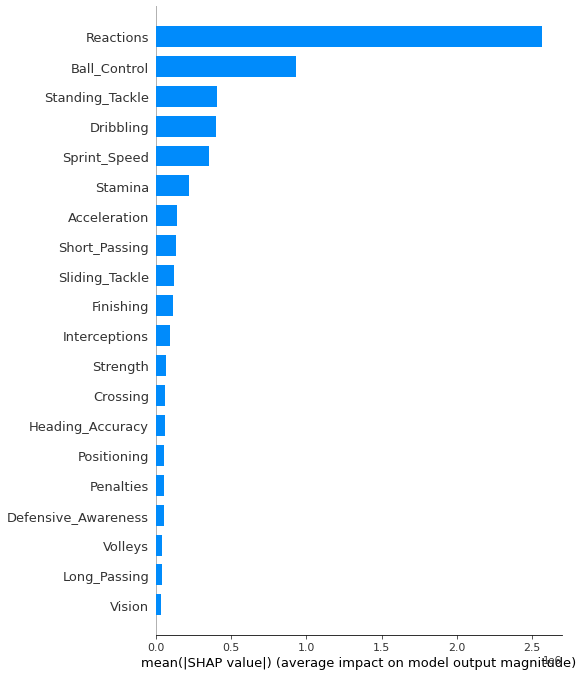

In [12]:
fig = plt.figure(1)
shap.summary_plot(shap_values_xgb, X, plot_type="bar")
fig.savefig("../result/shapvalue_global/xbt_sumbar.pdf")

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


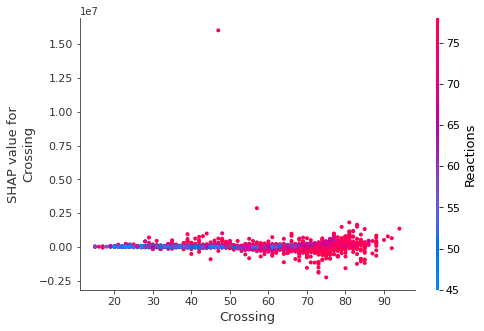

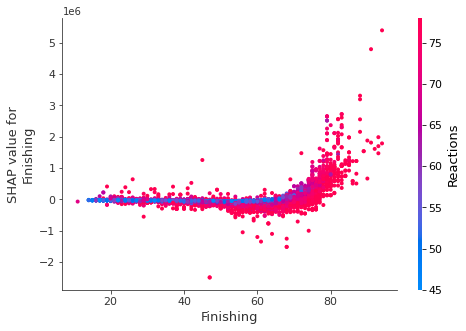

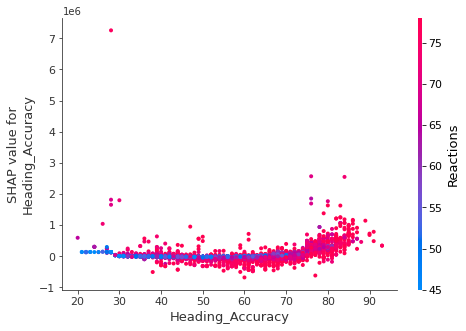

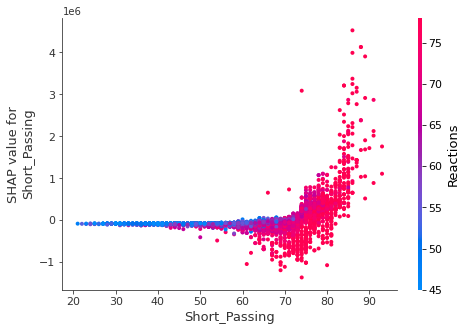

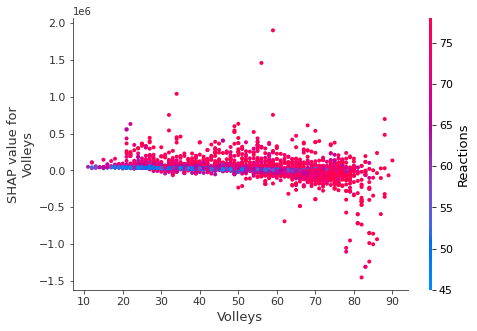

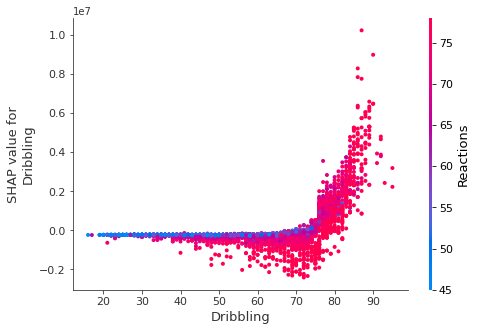

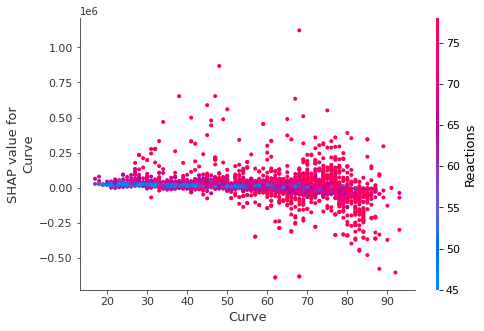

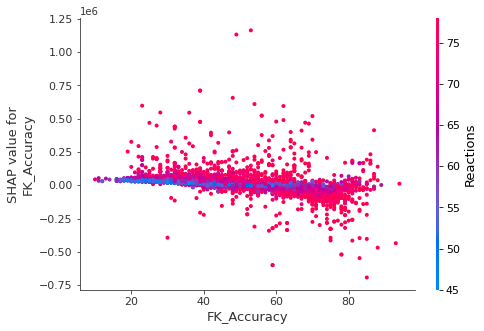

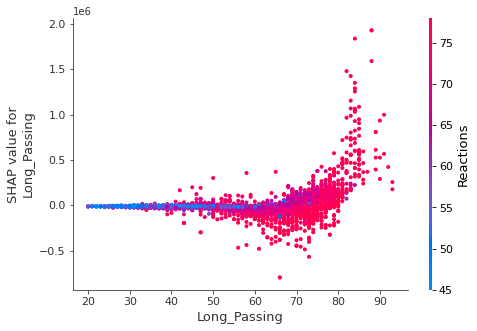

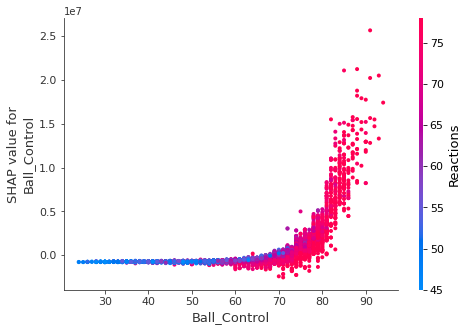

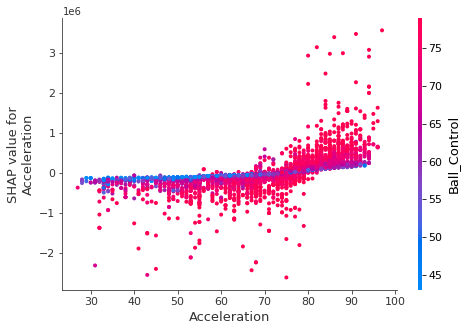

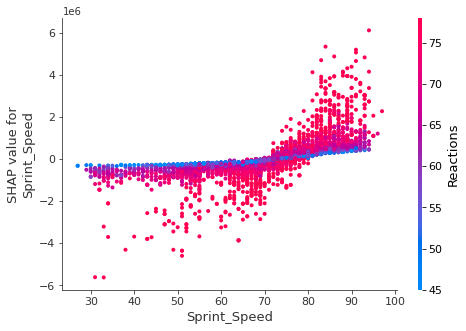

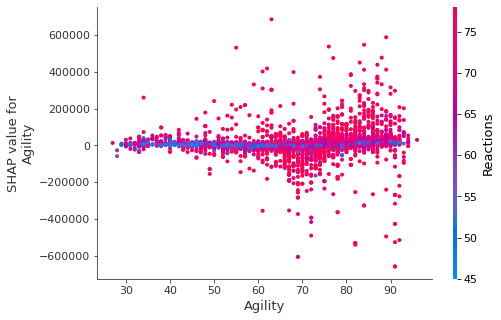

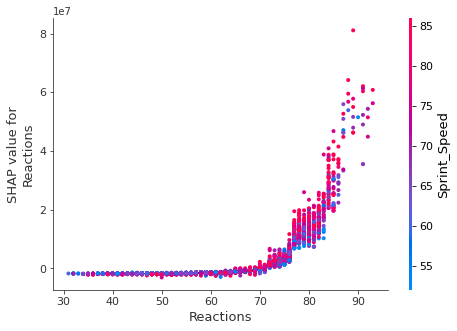

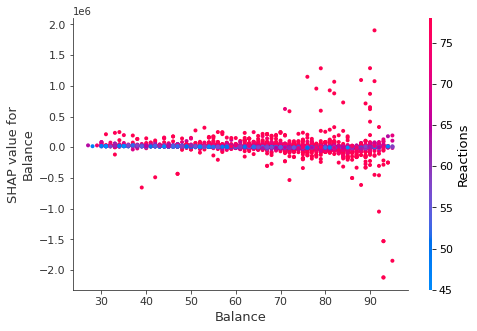

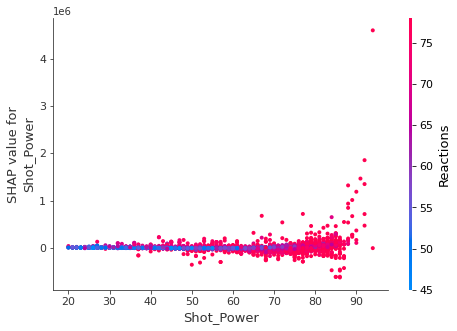

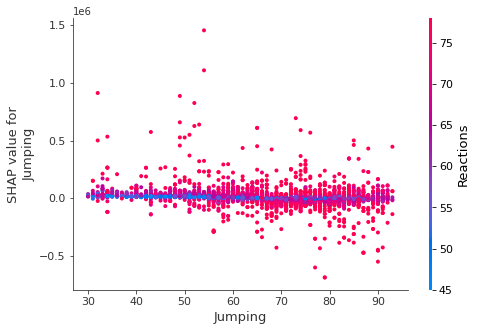

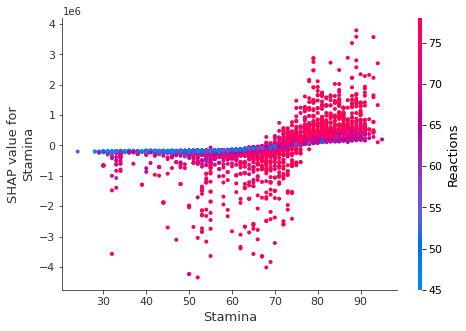

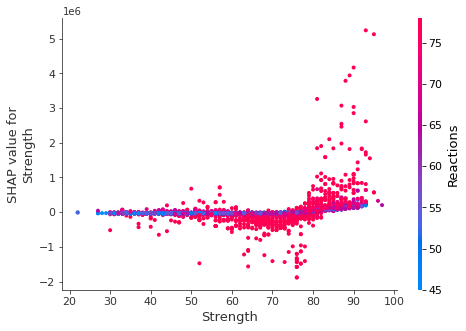

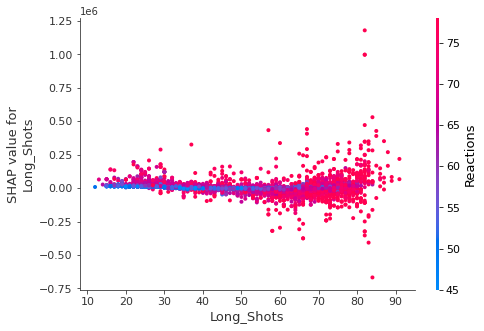

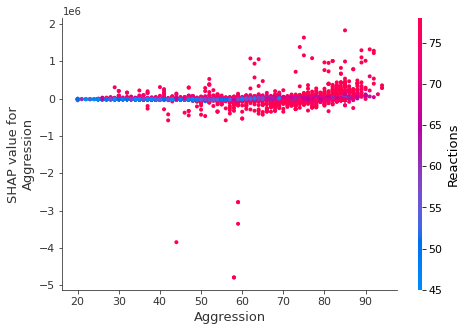

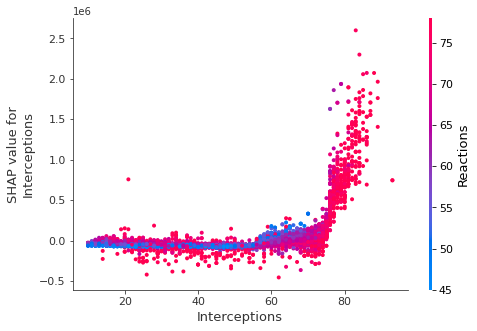

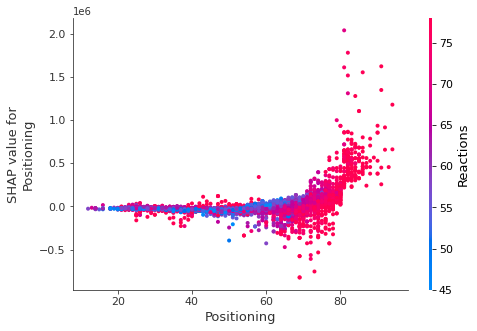

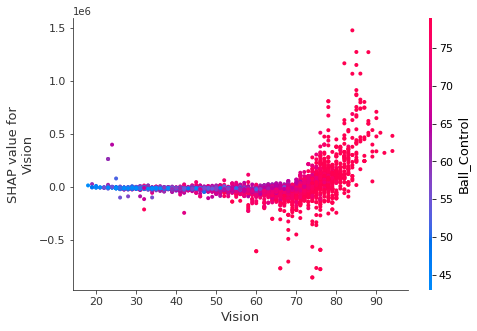

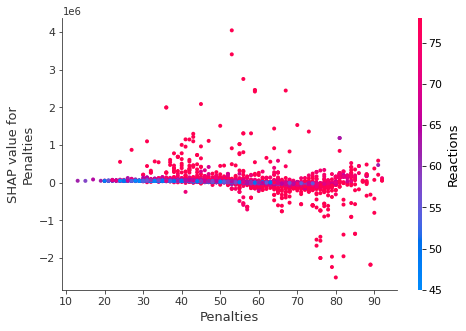

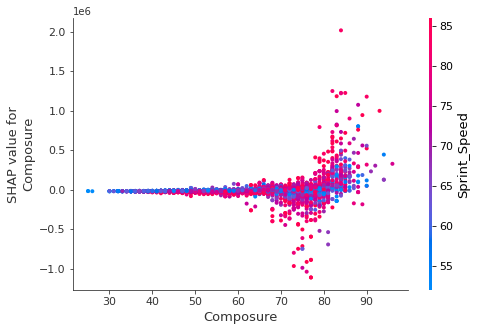

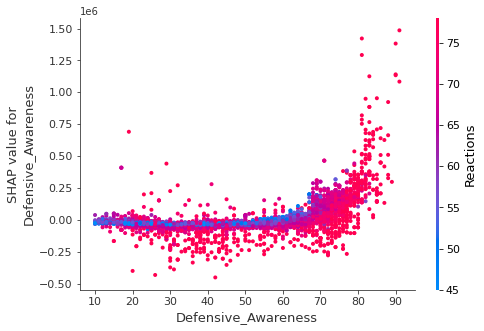

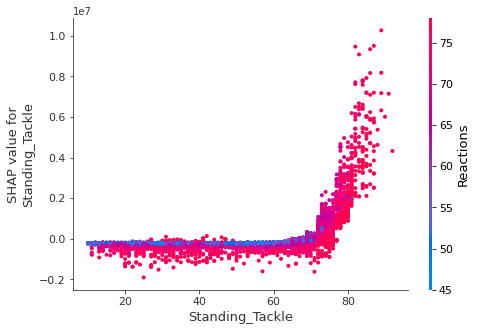

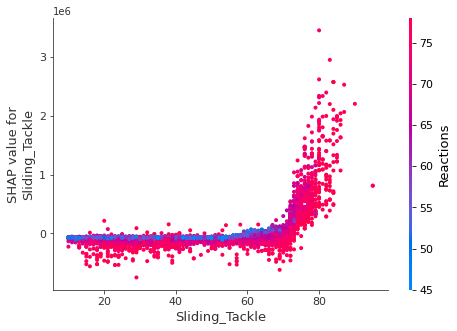

In [40]:
for i, name_col in enumerate(X.columns):
    shap.dependence_plot(ind=name_col, shap_values=shap_values_xgb.values, feature_names=shap_values_xgb.feature_names, features=shap_values_xgb.data, show=False)
    plt.savefig("../result/dependence_plot/xgb_{name}.png".format(name=name_col))

In [38]:
# for i, name_col in enumerate(X.columns):
#     shap.dependence_plot(i, shap_values_cbt, X, show=False)
#     plt.savefig("../result/dependence_plot/cbt_{name}.pdf".format(name=name_col))
# shap_values_xgb.feature_names

['Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defensive_Awareness',
 'Standing_Tackle',
 'Sliding_Tackle']